In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6132.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6144.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6133.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/2578.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/2564.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/1514.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6151.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6139.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/2574.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6159.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6157.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6149.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/2448.tif
/kaggle/input/virus-images/context_virus_RAW/validation/Ebola/6125.tif
/kaggl

In [34]:
import os, json, numpy as np, pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

BATCH_SIZE = 32
IMG_SIZE = (224, 224)   # مناسب لـ ResNet / EfficientNet


In [35]:
root_folders = [
    
    "/kaggle/input/virus-images/context_virus_RAW/test",
    "/kaggle/input/virus-images/context_virus_RAW/train",
    "/kaggle/input/virus-images/context_virus_RAW/validation"
]

csv_files = ["test_dataset.csv", "train_dataset.csv", "val_dataset.csv"]

image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".gif", ".webp"}

for i, folder in enumerate(root_folders):

    data = []

    for celeb_name in os.listdir(folder):
        celeb_folder = os.path.join(folder, celeb_name)

        if os.path.isdir(celeb_folder):

            for img_file in os.listdir(celeb_folder):
                if any(img_file.lower().endswith(ext) for ext in image_extensions):

                    img_path = os.path.join(celeb_folder, img_file)

                    data.append({
                        "path": img_path,
                        "label": celeb_name
                    })

    df = pd.DataFrame(data)
    df.to_csv(csv_files[i], index=False)

    print(f"{csv_files[i]} Created Successfully!")

test_dataset.csv Created Successfully!
train_dataset.csv Created Successfully!
val_dataset.csv Created Successfully!


In [36]:
TRAIN_DIR = "/kaggle/input/virus-images/context_virus_RAW/train"
VAL_DIR   = "/kaggle/input/virus-images/context_virus_RAW/validation"
TEST_DIR  = "/kaggle/input/virus-images/context_virus_RAW/test"


In [37]:
import os

print("PWD:", os.getcwd())
print("Files:", os.listdir("/kaggle/working"))

for f in ["train_dataset.csv", "val_dataset.csv", "test_dataset.csv",
          "train_dataset.csv", "val_dataset.csv", "test_dataset.csv"]:
    if os.path.exists("/kaggle/working/" + f):
        print(f, "size =", os.path.getsize("/kaggle/working/" + f))
    else:
        print(f, "NOT FOUND")


PWD: /kaggle/working
Files: ['test_dataset.csv', 'train_dataset.csv', 'val_dataset.csv', 'data', '.virtual_documents']
train_dataset.csv size = 1
val_dataset.csv size = 1
test_dataset.csv size = 1
train_dataset.csv size = 1
val_dataset.csv size = 1
test_dataset.csv size = 1


In [38]:
import os
import pandas as pd

TRAIN_DIR = "/kaggle/input/virus-images/context_virus_RAW/train"
VAL_DIR   = "/kaggle/input/virus-images/context_virus_RAW/validation"
TEST_DIR  = "/kaggle/input/virus-images/context_virus_RAW/test"

image_extensions = (".png",".jpg",".jpeg",".bmp",".gif",".webp",".tif",".tiff")

def build_csv(root_dir, out_csv):
    data = []
    for cls in os.listdir(root_dir):
        cls_path = os.path.join(root_dir, cls)
        if not os.path.isdir(cls_path):
            continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith(image_extensions):
                data.append({
                    "path": os.path.join(cls_path, fname),
                    "label": cls
                })
    df = pd.DataFrame(data)
    df.to_csv(out_csv, index=False)
    print(out_csv, "rows:", len(df))

build_csv(TRAIN_DIR, "/kaggle/working/train_dataset.csv")
build_csv(VAL_DIR,   "/kaggle/working/val_dataset.csv")
build_csv(TEST_DIR,  "/kaggle/working/test_dataset.csv")


/kaggle/working/train_dataset.csv rows: 745
/kaggle/working/val_dataset.csv rows: 248
/kaggle/working/test_dataset.csv rows: 252


In [39]:
train_df = pd.read_csv("/kaggle/working/train_dataset.csv")
val_df   = pd.read_csv("/kaggle/working/val_dataset.csv")
test_df  = pd.read_csv("/kaggle/working/test_dataset.csv")

print(train_df.shape, val_df.shape, test_df.shape)
print(train_df.head())


(745, 2) (248, 2) (252, 2)
                                                path  label
0  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
1  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
2  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
3  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
4  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola


In [40]:
# =============================
# Dataset Statistics (Virus)
# =============================

print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("\n=============================")

Total_Images = train_df.shape[0]
print(f"Total Images: {Total_Images}")

num_classes = train_df["label"].nunique()
print("Unique Classes:", num_classes)

classes = train_df["label"].unique()
print("\nClasses:")
print(classes)

print("\n=============================")

# Images count per class
class_counts = train_df["label"].value_counts()
print("Images per class:")
print(class_counts)


Train shape: (745, 2)
Val shape: (248, 2)
Test shape: (252, 2)

Total Images: 745
Unique Classes: 22

Classes:
['Ebola' 'Astrovirus' 'Machupo' 'Adenovirus' 'Papilloma' 'Rotavirus'
 'Nipah virus' 'Guanarito' 'Dengue' 'LCM' 'CCHF' 'Lassa' 'Influenza'
 'WestNile' 'Orf' 'Pseudocowpox' 'TBE' 'Rift Valley' 'Sapovirus' 'Marburg'
 'Norovirus' 'Cowpox']

Images per class:
label
Rift Valley     77
Ebola           65
Lassa           62
Marburg         57
Influenza       56
Astrovirus      46
CCHF            44
Adenovirus      40
Orf             38
Norovirus       32
Cowpox          30
Nipah virus     25
TBE             25
Rotavirus       22
LCM             22
Machupo         20
Pseudocowpox    20
Papilloma       19
Dengue          19
Guanarito       13
Sapovirus        8
WestNile         5
Name: count, dtype: int64


In [41]:
# =============================
# Confirm we use ALL 22 classes
# =============================

num_classes = train_df["label"].nunique()
classes = sorted(train_df["label"].unique())

print("Unique Classes (Train):", num_classes)
print("Classes:", classes)

assert num_classes == 22, f"Expected 22 classes but got {num_classes}"
print("✅ Using all 22 classes (OK)")


Unique Classes (Train): 22
Classes: ['Adenovirus', 'Astrovirus', 'CCHF', 'Cowpox', 'Dengue', 'Ebola', 'Guanarito', 'Influenza', 'LCM', 'Lassa', 'Machupo', 'Marburg', 'Nipah virus', 'Norovirus', 'Orf', 'Papilloma', 'Pseudocowpox', 'Rift Valley', 'Rotavirus', 'Sapovirus', 'TBE', 'WestNile']
✅ Using all 22 classes (OK)


In [42]:
train_set = set(train_df["label"].unique())
val_set   = set(val_df["label"].unique())
test_set  = set(test_df["label"].unique())

print("Missing in Val:", sorted(train_set - val_set))
print("Missing in Test:", sorted(train_set - test_set))
print("Extra in Val:", sorted(val_set - train_set))
print("Extra in Test:", sorted(test_set - train_set))


Missing in Val: []
Missing in Test: []
Extra in Val: []
Extra in Test: []


In [43]:
import pandas as pd

train_df = pd.read_csv("/kaggle/working/train_dataset.csv")
val_df   = pd.read_csv("/kaggle/working/val_dataset.csv")
test_df  = pd.read_csv("/kaggle/working/test_dataset.csv")

print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("Number of classes:", train_df["label"].nunique())


Train shape: (745, 2)
Val shape: (248, 2)
Test shape: (252, 2)
Number of classes: 22


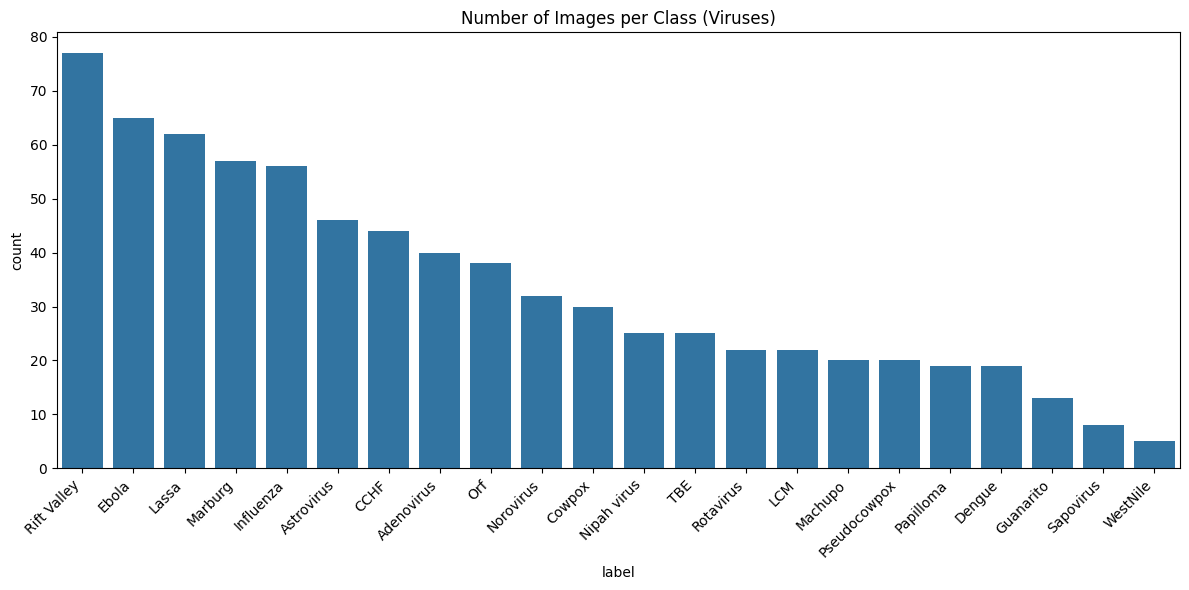

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x="label", order=train_df["label"].value_counts().index)
plt.title("Number of Images per Class (Viruses)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


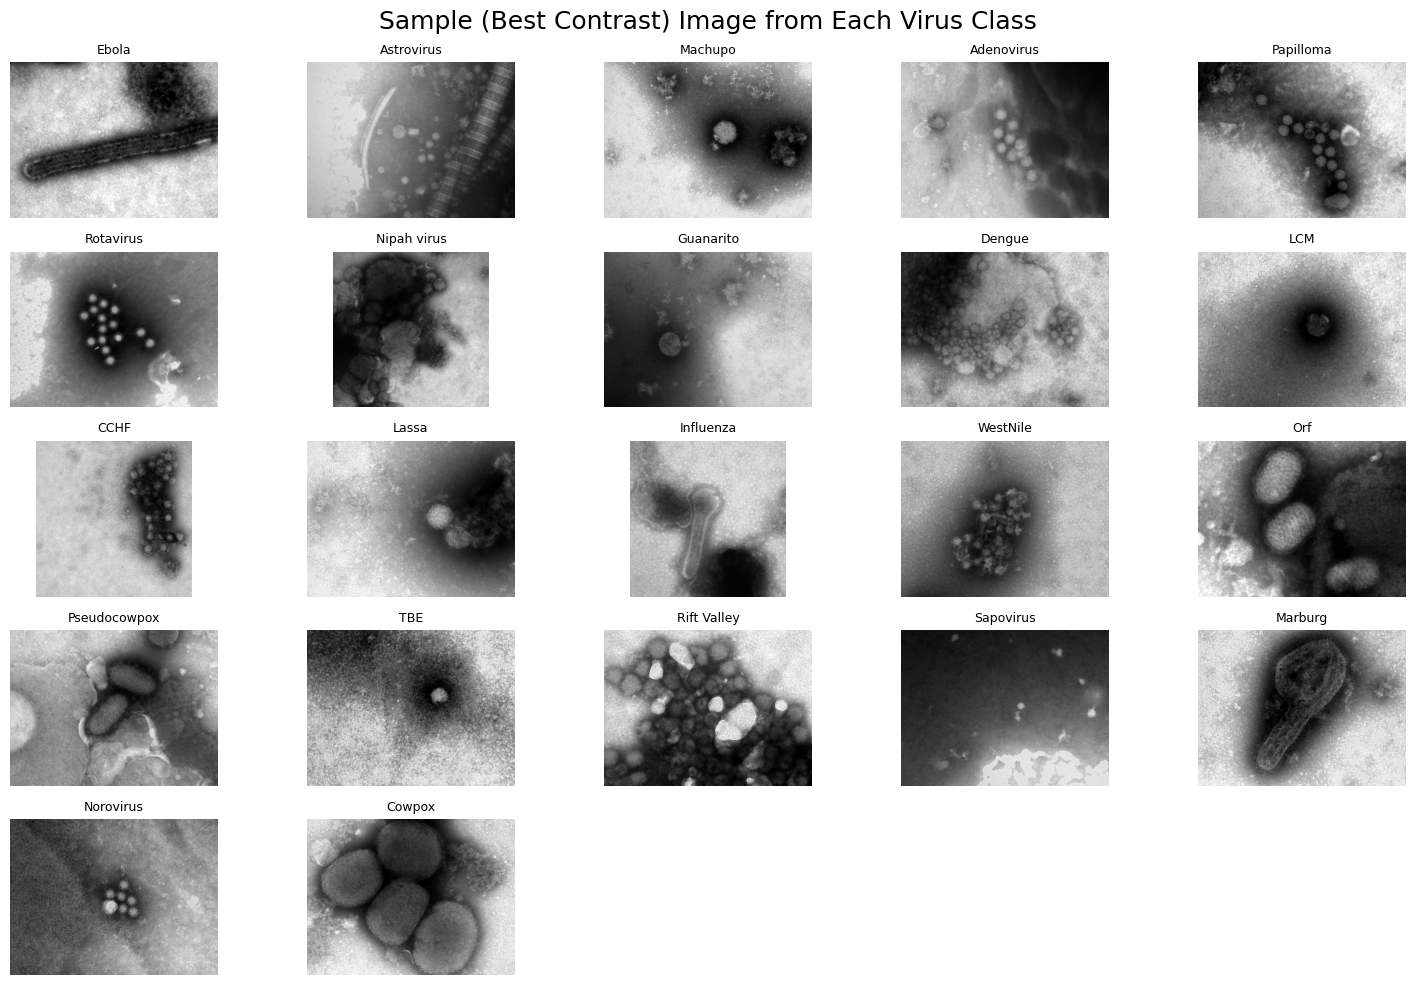

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

def load_for_display(path):
    img = Image.open(path)

    # جرّب أول frame
    try:
        img.seek(0)
    except:
        pass

    img = np.array(img)

    # لو الصورة (H,W) خليها 3 قنوات
    if img.ndim == 2:
        img = np.stack([img]*3, axis=-1)

    # لو فيها Alpha شيله
    if img.shape[-1] == 4:
        img = img[..., :3]

    img = img.astype(np.float32)

    # Normalize: خليه 0..255 (مهم جدًا لصور 16-bit)
    mn, mx = img.min(), img.max()
    if mx > mn:
        img = (img - mn) / (mx - mn) * 255.0
    else:
        img = np.zeros_like(img)

    return img.astype(np.uint8)

def pick_good_image(df_label, tries=20):
    paths = df_label["path"].tolist()
    random.shuffle(paths)

    best = None
    best_score = -1

    for p in paths[:tries]:
        try:
            img = load_for_display(p)
            # Score = التباين (لو قليل قوي تبقى بيضا/فاضية)
            score = img.std()
            if score > best_score:
                best_score = score
                best = (p, img)
        except:
            continue

    return best  # (path, img) أو None

# ===== show 1 good image per class =====
classes = train_df["label"].unique()
cols = 5
rows = (len(classes) + cols - 1) // cols

plt.figure(figsize=(15, 10))
plot_idx = 1

for label in classes:
    df_label = train_df[train_df["label"] == label]
    picked = pick_good_image(df_label, tries=30)

    plt.subplot(rows, cols, plot_idx)
    if picked is None:
        plt.title(f"{label}\n(no valid img)", fontsize=9)
        plt.axis("off")
    else:
        p, img = picked
        plt.imshow(img)
        plt.title(label, fontsize=9)
        plt.axis("off")

    plot_idx += 1

plt.suptitle("Sample (Best Contrast) Image from Each Virus Class", fontsize=18)
plt.tight_layout()
plt.show()


In [46]:
import os

IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")

def clean_df(df):
    df = df.copy()
    # خلي بس الملفات اللي امتدادها صورة
    df = df[df["path"].str.lower().str.endswith(IMG_EXTS)]
    # خلي بس اللي موجودة فعلاً كملف
    df = df[df["path"].apply(lambda p: os.path.isfile(p))]
    df = df.reset_index(drop=True)
    return df

train_df = clean_df(train_df)
val_df   = clean_df(val_df)
test_df  = clean_df(test_df)

print("Train:", len(train_df))
print("Val:", len(val_df))
print("Test:", len(test_df))

print(train_df.head(3))


Train: 745
Val: 248
Test: 252
                                                path  label
0  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
1  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola
2  /kaggle/input/virus-images/context_virus_RAW/t...  Ebola


In [47]:
from PIL import Image, ImageSequence
import numpy as np
import tensorflow as tf

IMG_SIZE = (224, 224)

def load_image(path, label):
    path = path.numpy().decode("utf-8")

    img = Image.open(path)

    # لو TIFF multi-page خد أول فريم
    try:
        img = next(ImageSequence.Iterator(img))
    except Exception:
        pass

    if img.mode != "RGB":
        img = img.convert("RGB")

    img = img.resize(IMG_SIZE)
    img = np.array(img).astype("float32") / 255.0
    return img, label


In [48]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1) خد الليبلز كنص
y_train = train_df["label"].values
y_val   = val_df["label"].values
y_test  = test_df["label"].values

# 2) Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)
y_test  = le.transform(y_test)

# 3) عدد الكلاسات = 22
num_classes = len(le.classes_)
print("num_classes =", num_classes)
print("classes:", le.classes_[:10], "...")  # عرض أول 10


num_classes = 22
classes: ['Adenovirus' 'Astrovirus' 'CCHF' 'Cowpox' 'Dengue' 'Ebola' 'Guanarito'
 'Influenza' 'LCM' 'Lassa'] ...


In [49]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def decode_resize(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

def make_dataset(df, shuffle=True):
    paths = df["path"].values
    labels = df["label_id"].values

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(decode_resize, num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds


In [50]:
train_ds = make_dataset(train_df, shuffle=True)
val_ds   = make_dataset(val_df, shuffle=False)
test_ds  = make_dataset(test_df, shuffle=False)


KeyError: 'label_id'

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def _load_with_pil(path):
    path = path.numpy().decode("utf-8")
    try:
        img = Image.open(path).convert("RGB")
        img = img.resize((IMG_SIZE, IMG_SIZE))
        arr = np.array(img, dtype=np.float32) / 255.0
        return arr
    except Exception:
        # لو الصورة بايظة/فورمات مش مقروء -> نرجع صورة صفر (هنتفلترها بعدين)
        return np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)

def decode_resize(path, label):
    img = tf.py_function(_load_with_pil, [path], tf.float32)
    img.set_shape((IMG_SIZE, IMG_SIZE, 3))
    return img, label

def make_dataset(df, shuffle=True):
    paths  = df["path"].astype(str).values
    labels = df["label_id"].values

    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(decode_resize, num_parallel_calls=AUTOTUNE)

    # فلترة الصور اللي رجعت zeros (يعني فشلت في القراية)
    ds = ds.filter(lambda img, lab: tf.reduce_sum(img) > 0)

    if shuffle:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds


In [ ]:
train_ds = make_dataset(train_df, shuffle=True)
val_ds   = make_dataset(val_df, shuffle=False)
test_ds  = make_dataset(test_df, shuffle=False)

for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels[:10])


In [ ]:
# Print shapes like the notebook cell (but for your virus project)

for x, y in train_ds.take(1):
    print("train:", x.shape, y.shape)

for x, y in val_ds.take(1):
    print("val  :", x.shape, y.shape)

for x, y in test_ds.take(1):
    print("test :", x.shape, y.shape)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE

# لو عندك train_ds/val_ds/test_ds جاهزين من قبل
# نخليهم أسرع
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
], name="augmentation")


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (224, 224)
NUM_CLASSES = 22   # عدد فئات الفيروسات عندك

base = keras.applications.EfficientNetB0(
    include_top=False,
    weights=None,          # 🔴 أهم سطر (من غير إنترنت)
    input_shape=IMG_SIZE + (3,)
)

base.trainable = True  # نخليه يتعلم من صور الفيروسات

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()


In [ ]:
BASE_DIR = "/kaggle/input/virus-images/context_virus_RAW"

train_dir = os.path.join(BASE_DIR, "train")
val_dir   = os.path.join(BASE_DIR, "validation")
test_dir  = os.path.join(BASE_DIR, "test")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print("Classes:", train_generator.class_indices)
